In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from classification import IsLstmTsClassifier


def _load_data():
    """Load the data"""
    # path = '/home/haseeb/resources/data/kth_thesis/mix'
    path = '/home/haseeb/resources/data/kth_thesis/corridor_5m_normal-traffic_no-pings/'
    X_train = np.load(path + '/train_data_75_4_push_vs_all.npy')
    y_train = np.load(path + '/train_labels_75_4_push_vs_all.npy')
    X_test = np.load(path + '/test_data_75_4_push_vs_all.npy')
    y_test = np.load(path + '/test_labels_75_4_push_vs_all.npy')
    return X_train, y_train, X_test, y_test

In [2]:
# load the data
X_train, y_train, X_test, y_test = _load_data()
# fit a model
classifier = IsLstmTsClassifier(drop_prob=0.5, num_layers=1, hidden_size=100, max_iterations=1000, batch_size=10,
                                    eta=0.01, init_scale=0.08, max_grad_norm=25)
classifier.fit(X_train, y_train)

using the train data as validation set
Train with approximately 59 epochs
At 0 out of 1000 val cost is 0.624 and val acc is 1.000
At 100 out of 1000 val cost is 0.284 and val acc is 0.900
At 200 out of 1000 val cost is 0.015 and val acc is 1.000
At 300 out of 1000 val cost is 0.003 and val acc is 1.000
At 400 out of 1000 val cost is 0.001 and val acc is 1.000
At 500 out of 1000 val cost is 0.000 and val acc is 1.000
At 600 out of 1000 val cost is 0.000 and val acc is 1.000
At 700 out of 1000 val cost is 0.000 and val acc is 1.000
At 800 out of 1000 val cost is 0.002 and val acc is 1.000
At 900 out of 1000 val cost is 0.000 and val acc is 1.000
Converted 4 variables to const ops.
102 ops in the final graph.


In [3]:
print("Classifer.score()")
print(classifier.score(X_test, y_test))
predictions = classifier.predict(X_test)
logits = classifier.get_logits(X_test)

Classifer.score()
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.
  0.  0.  0.]
0.982456140351


In [31]:
np.sum(predictions == 1)
print()

print(np.concatenate((logits,np.expand_dims(np.argmax(logits, axis=1), axis=1)) , axis=1))


[[ 11.20804501 -11.16870785   0.        ]
 [  8.62853909  -8.55805492   0.        ]
 [ 11.62332439 -11.62530804   0.        ]
 [ 12.26697063 -12.25261116   0.        ]
 [  8.41546249  -8.32512665   0.        ]
 [ 10.37321377 -10.2607832    0.        ]
 [ 11.109972   -10.96882915   0.        ]
 [ 11.65639687 -11.59670258   0.        ]
 [ 12.58374691 -12.37962055   0.        ]
 [  2.20334625  -2.22710323   0.        ]
 [  8.36280441  -8.28769493   0.        ]
 [  6.84186411  -6.71345997   0.        ]
 [  5.98221588  -5.83735037   0.        ]
 [ 11.83051872 -11.68923855   0.        ]
 [  5.11277533  -5.174119     0.        ]
 [ 11.35228252 -11.21859646   0.        ]
 [  6.36631775  -6.28098965   0.        ]
 [  6.52093029  -6.48622942   0.        ]
 [ -7.52818346   7.21648979   1.        ]
 [ -7.52818346   7.21648979   1.        ]
 [  9.53660488  -9.45756817   0.        ]
 [ 10.28446388 -10.14100361   0.        ]
 [ -7.52818346   7.21648979   1.        ]
 [ 10.6355505  -10.52245712   0. 

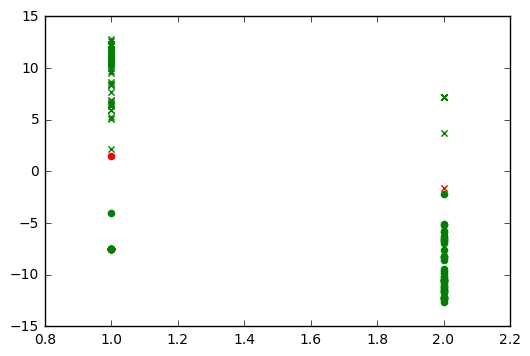

In [5]:
def plot_results(y, predictions, logits):
    plt.figure()
    classes = np.array(range(1, np.unique(y).size + 1))
    for i in range(logits.shape[0]):
        color = "g" if y[i] == predictions[i] else "r"
        plt.scatter(np.delete(classes, int(y[i])), np.delete(logits[i, :], int(y[i])), color=color, marker='o')
        plt.scatter(classes[int(y[i])], logits[i, int(y[i])], color=color, marker='x')
    plt.show()
plot_results(y_test[:], predictions, logits)

### threshold: 3

In [32]:
predictions_train = classifier.predict(X_train)
logits_train = classifier.get_logits(X_train)

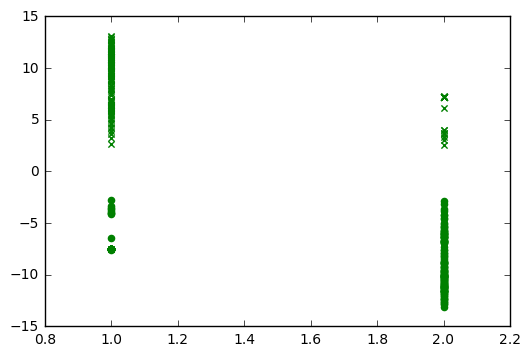

In [33]:
plot_results(y_train[:], predictions_train, logits_train)